# Сборный проект

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Вывод

- Информация о структуре данных - двумерная(DataFrame);
- таблица имеет 16715 строк и 11 столбцов; 
- присутствуют названия столбцов и количество ненулевых значений;
- в таблице присутствуют значения типов object(5 столбцов), float(6 столбцов);
- использование памяти.

Пропуски наблюдаются в 6-ти столбцах, далее в предобработке данных будем заполнять пропуски по мере необходимости.

## Предобработка данных

### Приведем названия столбцов к нижнему регистру

In [5]:
data.columns = map(str.lower, data.columns)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Преобразование данных в нужные типы и обработка пропусков

In [6]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')

data['critic_score'] = data['critic_score'].fillna(0)
data['critic_score'] = data['critic_score'].astype('int')

Заменила пропуски на 0, затем заменила тип данных на нужный, в столбце "year_of_release" было необходимо заменить на int, в столбце "critic_score" посмотрела по уникальным значениям, что нет значений типа float, поэтому для удобства заменила на тип int.

In [7]:
data['user_score'] = data['user_score'].fillna('tbd')

data['rating'] = data['rating'].fillna('RP')

Здесь в столбце "user_score" заменила пропуски на аббревиатуру 'tbd' так как она значит, что оценка пользователя еще не определена, то есть пользователь еще ее не поставил, игра ожидает оценки. В столбце "rating" пропуски заменила на 'RP', так как 'RP' означает, что рейтинг ожидается.

In [8]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0,tbd,RP
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0,tbd,RP


Пропуски остались только в двух столбцах это "name" и "genre" по 2 пропуска, строки совпадают, поэтому просто удалим две строки, данные которые указаны в столбцах, связанные с продажами минимальны или вообще равны нулю, не повлияют на наш анализ.

In [9]:
data = data.dropna().reset_index(drop=True)

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [10]:
data['sales_sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды, я думаю, что нет, но дальнейший анализ покажет точнее.

In [11]:
data_year = data.groupby(by = ['year_of_release'])[['name']].count()
data_year

,name
year_of_release,
0,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


<AxesSubplot:xlabel='None,year_of_release'>

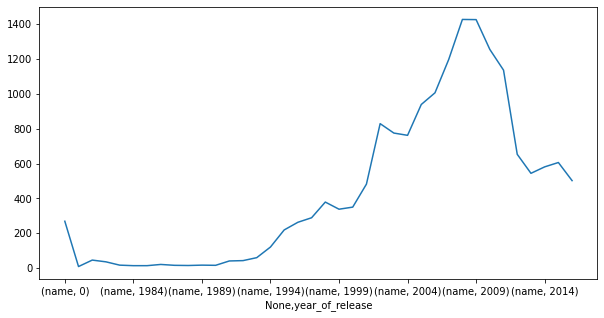

In [12]:
data_year.unstack().plot(figsize = (10, 5))

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам:

In [13]:
data_platform_sales_sum = data.groupby(by = ['platform'], as_index=False)['sales_sum'].sum()
data_platform_sales_sum = data_platform_sales_sum.sort_values(by = 'sales_sum', ascending=False)
data_platform_sales_sum

,platform,sales_sum
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


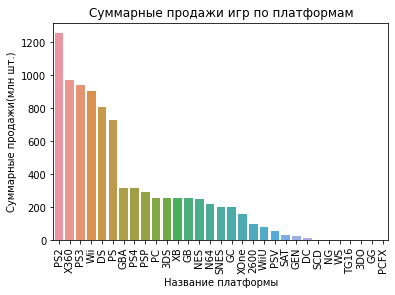

In [14]:
data_sales_sum_platform = sns.barplot(x='platform', y='sales_sum', data = data_platform_sales_sum)
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи(млн шт.)')
plt.title('Суммарные продажи игр по платформам')
plt.xticks(rotation = 90)
plt.show()

In [15]:
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [16]:
data_year_sales_sum = data.groupby(by = ['year_of_release'], as_index=False)['sales_sum'].sum()
data_year_sales_sum

,year_of_release,sales_sum
0,0,98.92
1,1980,11.38
2,1981,35.68
3,1982,28.88
4,1983,16.80
5,1984,50.35
6,1985,53.95
7,1986,37.08
8,1987,21.70
9,1988,47.21


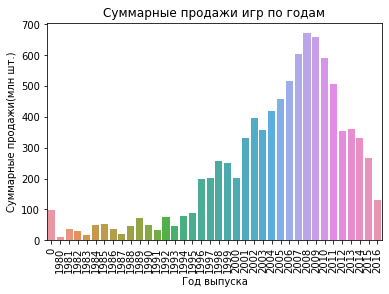

In [17]:
data_sales_sum_year = sns.barplot(x='year_of_release', y='sales_sum', data = data_year_sales_sum)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи(млн шт.)')
plt.title('Суммарные продажи игр по годам')
plt.xticks(rotation = 90)
plt.show()

In [18]:
current_period = [2013, 2014, 2015, 2016]

Сделаем срез данных по платформам, которые наиболее прибыльны и по актуальному периоду, я взяла последние 4 года, так как за 2016 год данные неполные.

In [19]:
data_query = data.query('platform == @top_platform')
data_query = data_query.query('year_of_release == @current_period')
data_query['platform'].unique()

array(['PS3', 'X360', 'Wii', 'DS'], dtype=object)

<div class="alert alert-info">
Здесь можно добавить строчку с уникальными значениями после среза данных и увидим, что топовых платформ было 6, а после среза данных осталось 4. </div>

Посмотрим какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ:

In [20]:
data_top = data_query.pivot_table(index='year_of_release', columns='platform', values='sales_sum', aggfunc='sum')
data_top.columns = ['DS', 'PS3', 'Wii', 'X360']
data_top

,DS,PS3,Wii,X360
year_of_release,,,,
2013,1.54,113.25,8.59,88.58
2014,NaN,47.76,3.75,34.74
2015,NaN,16.82,1.14,11.96
2016,NaN,3.60,0.18,1.52


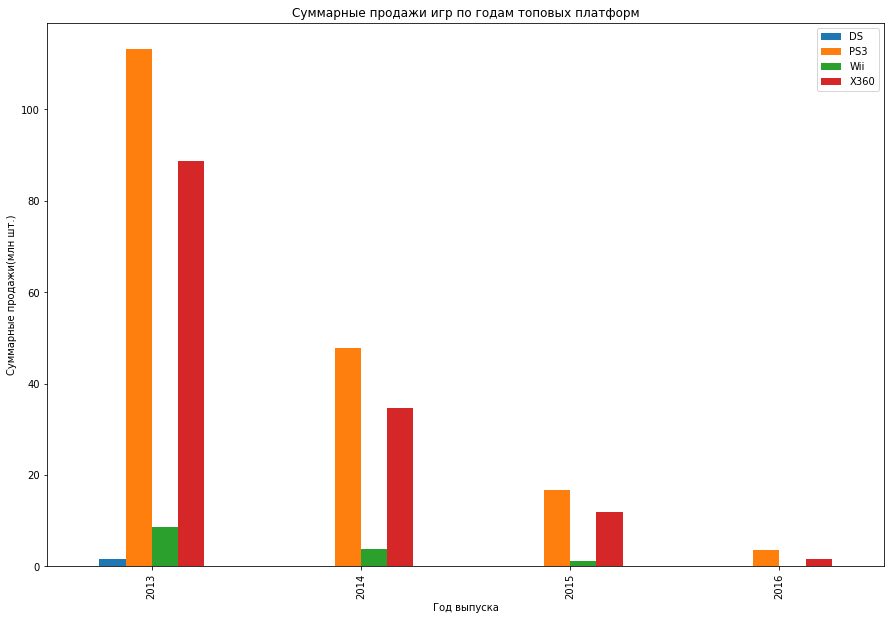

In [21]:
data_top.plot(y=['DS', 'PS3', 'Wii', 'X360'], kind='bar', figsize=(15,10))
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи(млн шт.)')
plt.title('Суммарные продажи игр по годам топовых платформ')
plt.xticks(rotation = 90)
plt.show()

Для начала выбрали лидирующие платформы(их было 6 штук), далее выбрали актуальный период(я выбраза за 4 года с 2013 по 2016), далее сделала срез нашего первоисходного датафрейма по лидирующим платформам и по актуальному периоду, в конечном итоге осталось 4 лидирующие платформы, платформа 'PS' и 'PS2' отпали, так как не входили в актуальный период, затем посчитали для них суммарные продажи и построили столбчатый график для того, чтобы оценить как продажи по платформам ведут себя по годам. 
На графике видим, что платформа 'DS' наблюдается только в 2013 году и продажи очень низки. Платформа 'PS3' наблюдается весь период, в каждом последующем году видим спад продаж. Платформа 'Wii', не считая 'DS' в актуальном периоде имеет самые низкие продажи, в 2016 году не наблюдаем данную платформу(наверняка данные за 2016 год были неполными). И наконец, платформа 'X360' в актуальном периоде вторая по количеству продаж, в каждом последующем году видим спад продаж, платформа наблюдалась весть актуальный период.

Построим графики по глобальным продажам игр в разбивке по платформам:

Найдем максимум, минимум, 1 и 3 квартили и медиану:

In [22]:
data_top_platform = data_query.pivot_table(index='name', columns='platform', values='sales_sum', aggfunc='sum')

max_value = data_top_platform.max()
min_value = data_top_platform.min()

display(data_top_platform)
display(max_value)
display(min_value)

data_top_platform.quantile([0.25,0.5,0.75])

platform,DS,PS3,Wii,X360
name,,,,
Frozen: Olaf's Quest,0.51,NaN,NaN,NaN
2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe,NaN,NaN,NaN,0.11
2014 FIFA World Cup Brazil,NaN,0.61,NaN,0.43
3rd Super Robot Wars Z Jigoku Hen,NaN,0.23,NaN,NaN
3rd Super Robot Wars Z: Tengoku-Hen,NaN,0.15,NaN,NaN
...,...,...,...,...
Yoru no Nai Kuni,NaN,0.05,NaN,NaN
Young Justice: Legacy,NaN,0.09,0.03,0.01
Zillions of Enemy X: Zetsukai no Crusade,NaN,0.02,NaN,NaN


platform
DS       0.51
PS3     21.05
Wii      3.58
X360    16.27
dtype: float64

platform
DS      0.03
PS3     0.01
Wii     0.01
X360    0.01
dtype: float64

platform,DS,PS3,Wii,X360
0.25,0.0675,0.04,0.045,0.080
0.50,0.1500,0.15,0.180,0.265
0.75,0.2525,0.51,0.755,0.795


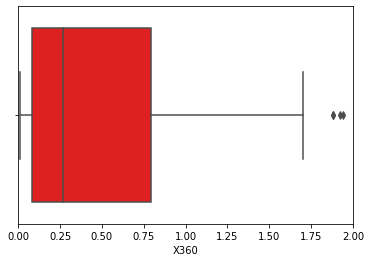

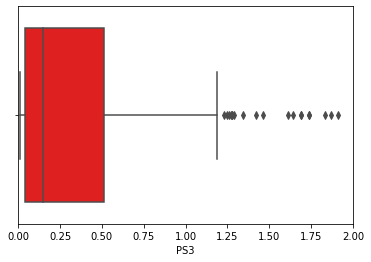

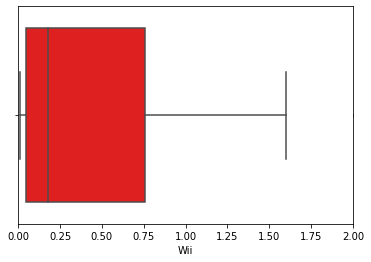

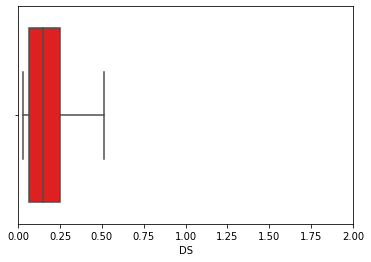

In [23]:
top_platform = ['X360', 'PS3', 'Wii', 'DS']

for platform in top_platform:
    sns.boxplot(x=data_top_platform[platform],
                color = 'red',
                orient='h'
               )
    plt.xlim(0, 2)
    #plt.ylim(,)
    plt.show()
    
#title = f'Продажи игр(млн шт) по платформе {platform}',
#grid = True,
#color = 'red',
#figsize = (20,2)
#set_title("Продажи игр(млн шт) по платформе {platform}", fontsize=16),
#set_xlabel("Conditions", fontsize=14),
#set_ylabel("Values", fontsize=14)

Опишу график по первой платформе, остальные по аналогии. Платформа 'X360': Минимальное значение - 0.01, 50% продаж находятся между 0.08 и 0.795, 25% меньше 0.08 и 25% больше 0.795. Данные, которые сильно отличаются от основных данных совокупности, называют выбросами. Выбросы можно определить относительно верхнего и нижнего квартиля. Выбросом считается, значение в 1,5 раза больше или меньше разности 3 и 1 квартиля. Для данной платформы разность квартилей = 0.795 - 0.08 = 0.715, значит 0.08 - 1.5 * 0.715 = -0.9925 и 0.795 + 1.5 * 0.715 = 1.8675 считаются граничными значениями. Все значения, которые больше 1.8675 и меньше -0.9925, называются выбросами. Значения между внутренним и внешним ограждениями называют умеренными выбросами.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами:

Возьмем из датафрейма нужные для анализа столбцы и сделаем срез данных по одной популярной платформе, я выбрала "Wii":

In [24]:
data_sales_score = data_query[['platform', 'sales_sum', 'critic_score', 'user_score']]
data_x360 = data_sales_score.query('platform == "X360"')
data_x360

,platform,sales_sum,critic_score,user_score
23,X360,16.27,97,8.1
60,X360,10.24,73,2.6
72,X360,9.18,0,tbd
263,X360,4.28,0,4.9
271,X360,4.22,84,4.2
...,...,...,...,...
16299,X360,0.01,0,tbd
16448,X360,0.01,0,4.5
16458,X360,0.01,0,6.2
16489,X360,0.01,0,tbd


Найдем корреляцию и построим диаграммы рассеяния:

Для начала найдем корреляцию между продажами и оценкой критиков:

In [25]:
data_x360['sales_sum'].corr(data_x360['critic_score'])

0.2465727670167554

Далее построим диаграмму рассеяния:

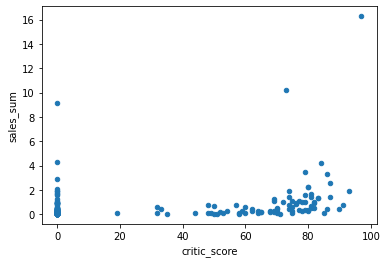

In [26]:
data_x360.plot(y='sales_sum', x='critic_score', kind='scatter')
plt.show()

Теперь найдем корреляцию между продажами и оценкой пользователей:

Для подсчета корреляции в данном случае нужно отбросить все оценки пользователей равные "tbd": 

In [ ]:
data_without_tbd = data_x360.query('user_score != "tbd"')
data_without_tbd['user_score'] = data_without_tbd['user_score'].astype('float')

In [ ]:
import warnings warnings.filterwarnings("ignore", category=DeprecationWarning)

In [657]:
data_x360['sales_sum'].corr(data_without_tbd['user_score'])

-0.011742185147181342

Наблюдаем отрицательную корреляционную связь, что означает обратную взаимосвязь.

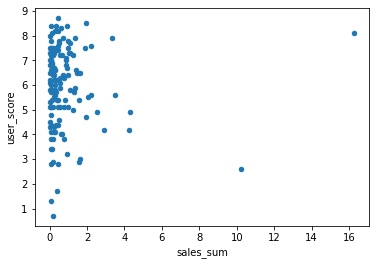

In [658]:
data_without_tbd.plot(x='sales_sum', y='user_score', kind='scatter')
plt.show()

В обоих случаях наблюдается слабая корреляционная связь, это означает, что значения между собой никак не связаны.

Проверим другие платформы:

In [659]:
data_ps3 = data_sales_score.query('platform == "PS3"')

data_ps3['sales_sum'].corr(data_ps3['critic_score'])

0.27927436323247207

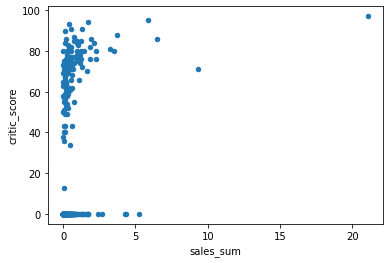

In [660]:
data_ps3.plot(x='sales_sum', y='critic_score', kind='scatter')
plt.show()

In [661]:
data_ps3_without_tbd = data_ps3.query('user_score != "tbd"')
data_ps3_without_tbd['user_score'] = data_ps3_without_tbd['user_score'].astype('float')

data_ps3['sales_sum'].corr(data_ps3_without_tbd['user_score'])

/tmp/ipykernel_36/2493203614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ps3_without_tbd['user_score'] = data_ps3_without_tbd['user_score'].astype('float')


0.0023944027357566925

В данном случае, проверили платформу "PS3" и корреляционная связь между продажами и оценкой критиков по этой платформе также очень слабая, это означает, что значения между собой никак не связаны.

Посмотрим на общее распределение игр по жанрам:

In [662]:
data_genre_sales_sum = data.groupby(by = ['genre'], as_index=False).agg({'sales_sum':['mean', 'median']})
data_sort_mean = data_genre_sales_sum.sort_values(by = ('sales_sum',   'mean'), ascending=False)
data_sort_median = data_genre_sales_sum.sort_values(by = ('sales_sum', 'median'), ascending=False)
display(data_sort_mean)
display(data_sort_median)

genre sales_sum       
                      mean median
4       Platform  0.932173   0.27
8        Shooter  0.795503   0.24
7   Role-Playing  0.623872   0.18
6         Racing  0.583403   0.19
10        Sports  0.566980   0.22
2       Fighting  0.527126   0.21
0         Action  0.517711   0.19
3           Misc  0.458577   0.16
9     Simulation  0.446701   0.15
5         Puzzle  0.418224   0.11
11      Strategy  0.255095   0.10
1      Adventure  0.182341   0.05

genre sales_sum       
                      mean median
4       Platform  0.932173   0.27
8        Shooter  0.795503   0.24
10        Sports  0.566980   0.22
2       Fighting  0.527126   0.21
0         Action  0.517711   0.19
6         Racing  0.583403   0.19
7   Role-Playing  0.623872   0.18
3           Misc  0.458577   0.16
9     Simulation  0.446701   0.15
5         Puzzle  0.418224   0.11
11      Strategy  0.255095   0.10
1      Adventure  0.182341   0.05

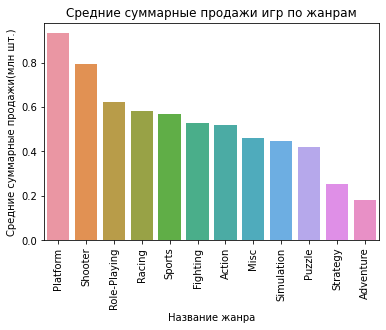

In [663]:
data_sales_sum_genre = sns.barplot(x='genre', y=('sales_sum',   'mean'), data = data_sort_mean)
plt.xlabel('Название жанра')
plt.ylabel('Средние суммарные продажи(млн шт.)')
plt.title('Средние суммарные продажи игр по жанрам')
plt.xticks(rotation = 90)
plt.show()

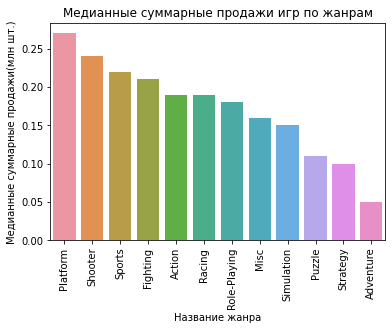

In [664]:
data_sales_sum_genre = sns.barplot(x='genre', y=('sales_sum', 'median'), data = data_sort_median)
plt.xlabel('Название жанра')
plt.ylabel('Медианные суммарные продажи(млн шт.)')
plt.title('Медианные суммарные продажи игр по жанрам')
plt.xticks(rotation = 90)
plt.show()

По жанрам можно сказать следующее: жанр "Platform" и "Shooter" выделяются среди других жанров, по ним самые высокие продажи как средние так и медианные. Последние 5 жанров также совпадают, находятся на одном месте. Самые низкие продажи у жанра "Adventure", по сравнению в самыми высокими продажами ниже в 5,5 раз.

## Портрет пользователя каждого региона

Самые популярные платформы (топ-5):

In [665]:
data_actual_period = data.query('year_of_release == @current_period')
data_rating = data_actual_period[['platform', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'rating']]
data_rating

,platform,genre,na_sales,eu_sales,jp_sales,rating
16,PS3,Action,7.02,9.09,0.98,M
23,X360,Action,9.66,5.14,0.06,M
31,PS4,Shooter,6.03,5.86,0.36,RP
33,3DS,Role-Playing,5.28,4.19,4.35,RP
42,PS4,Action,3.96,6.31,0.38,M
...,...,...,...,...,...,...
16701,PSV,Adventure,0.00,0.00,0.01,RP
16705,PSV,Misc,0.00,0.00,0.01,RP
16708,PS3,Action,0.00,0.00,0.01,RP
16710,PSV,Adventure,0.00,0.00,0.01,RP


Начнем с Северной Америки:

In [666]:
data_platform_na = data_rating.groupby(by = ['platform'], as_index=False)['na_sales'].sum()
data_platform_na = data_platform_na.sort_values(by = 'na_sales', ascending=False)
data_platform_na['share_of_sales'] = data_platform_na['na_sales'] / len(data_platform_na)
data_platform_na

,platform,na_sales,share_of_sales
4,PS4,108.74,9.885455
10,XOne,93.12,8.465455
9,X360,81.66,7.423636
3,PS3,63.50,5.772727
0,3DS,38.20,3.472727
8,WiiU,29.21,2.655455
2,PC,11.11,1.010000
7,Wii,6.56,0.596364
6,PSV,5.04,0.458182
1,DS,0.57,0.051818


<AxesSubplot:xlabel='platform', ylabel='share_of_sales'>

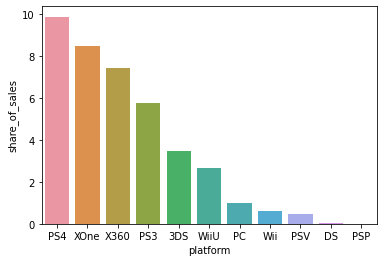

In [667]:
sns.barplot(x = 'platform', y = 'share_of_sales', data = data_platform_na)

Я бы даже выбрала топ-4 платформы именно по продажам в Северной Америке, это видно по доле продаж в таблице. Потому что уже с 5-ой позиции процент меньше больше чем в 2 раза.

Далее рассмотрим Европу:

In [668]:
data_platform_eu = data_rating.groupby(by = ['platform'], as_index=False)['eu_sales'].sum()
data_platform_eu = data_platform_eu.sort_values(by = 'eu_sales', ascending=False)
data_platform_eu['share_of_sales'] = data_platform_eu['eu_sales'] / len(data_platform_eu)
data_platform_eu

,platform,eu_sales,share_of_sales
4,PS4,141.09,12.826364
3,PS3,67.81,6.164545
10,XOne,51.59,4.690000
9,X360,42.52,3.865455
0,3DS,30.96,2.814545
2,PC,25.36,2.305455
8,WiiU,19.85,1.804545
6,PSV,6.10,0.554545
7,Wii,5.93,0.539091
1,DS,0.85,0.077273


<AxesSubplot:xlabel='platform', ylabel='share_of_sales'>

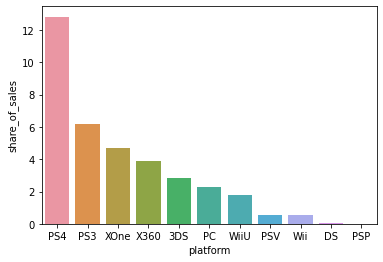

In [669]:
sns.barplot(x = 'platform', y = 'share_of_sales', data = data_platform_eu)

По продажам в Европе видно, что первые позиция явно лидирует, следующая позиция сокращается уже в 2 раза. Но в таблице видно топ-5.

И наконец Япония:

In [670]:
data_platform_jp = data_rating.groupby(by = ['platform'], as_index=False)['jp_sales'].sum()
data_platform_jp = data_platform_jp.sort_values(by = 'jp_sales', ascending=False)
data_platform_jp['share_of_sales'] = data_platform_jp['jp_sales'] / len(data_platform_jp)
data_platform_jp

,platform,jp_sales,share_of_sales
0,3DS,67.81,6.164545
3,PS3,23.35,2.122727
6,PSV,18.59,1.690000
4,PS4,15.96,1.450909
8,WiiU,10.88,0.989091
5,PSP,3.29,0.299091
9,X360,0.51,0.046364
10,XOne,0.34,0.030909
7,Wii,0.05,0.004545
1,DS,0.00,0.000000


<AxesSubplot:xlabel='platform', ylabel='share_of_sales'>

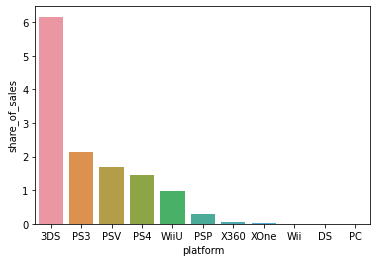

In [671]:
sns.barplot(x = 'platform', y = 'share_of_sales', data = data_platform_jp)

В Японии заметно, что первая позиция лидирует, следующая уже в 3 раза меньше, далее почти все платформы находяться на одном уровне по продажам. Некоторых платформ вообще не наблюдается.

Общий вывод можно сделать такой, что во всех трех регионах на лидирующих позициях стоят такие платформы как "PS3" и "PS4".

Самые популярные жанры (топ-5):

Начнем с Северной Америки:

In [672]:
data_genre_na = data_rating.groupby(by = ['genre'], as_index=False)['na_sales'].sum()
data_genre_na = data_genre_na.sort_values(by = 'na_sales', ascending=False)
data_genre_na['share_of_sales'] = data_genre_na['na_sales'] / len(data_genre_na)
data_genre_na

,genre,na_sales,share_of_sales
0,Action,126.05,10.504167
8,Shooter,109.74,9.145000
10,Sports,65.27,5.439167
7,Role-Playing,46.40,3.866667
3,Misc,27.49,2.290833
4,Platform,18.14,1.511667
2,Fighting,15.55,1.295833
6,Racing,12.96,1.080000
1,Adventure,7.14,0.595000
9,Simulation,4.86,0.405000


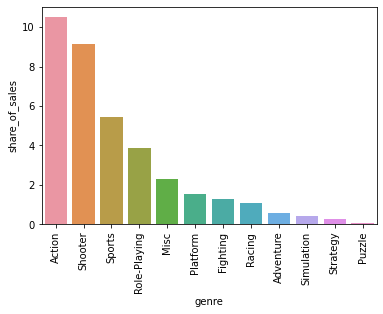

In [673]:
sns.barplot(x = 'genre', y = 'share_of_sales', data = data_genre_na)
plt.xticks(rotation = 90)
plt.show()

Здесь видим, что первые две позиции лидируют, 3-я позиция уже в 2 раза меньше, а 5-я позиция почти в 5 раз меньше первой, но в общем резких изменений нет.

Далее рассмотрим Европу:

In [674]:
data_genre_eu = data_rating.groupby(by = ['genre'], as_index=False)['eu_sales'].sum()
data_genre_eu = data_genre_eu.sort_values(by = 'eu_sales', ascending=False)
data_genre_eu['share_of_sales'] = data_genre_eu['eu_sales'] / len(data_genre_eu)
data_genre_eu

,genre,eu_sales,share_of_sales
0,Action,118.13,9.844167
8,Shooter,87.86,7.321667
10,Sports,60.52,5.043333
7,Role-Playing,36.97,3.080833
6,Racing,20.19,1.682500
3,Misc,20.04,1.670000
4,Platform,15.58,1.298333
9,Simulation,10.92,0.910000
2,Fighting,8.55,0.712500
1,Adventure,8.25,0.687500


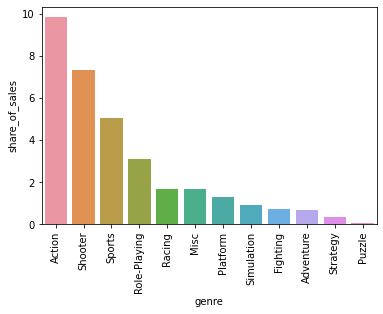

In [675]:
sns.barplot(x = 'genre', y = 'share_of_sales', data = data_genre_eu)
plt.xticks(rotation = 90)
plt.show()

Здесь такая же ситуация как и в СА видим, что 5-я позиция почти в 5 раз меньше первой, но в общем резких изменений нет.

И наконец Япония:

In [676]:
data_genre_jp = data_rating.groupby(by = ['genre'], as_index=False)['jp_sales'].sum()
data_genre_jp = data_genre_jp.sort_values(by = 'jp_sales', ascending=False)
data_genre_jp['share_of_sales'] = data_genre_jp['jp_sales'] / len(data_genre_jp)
data_genre_jp

,genre,jp_sales,share_of_sales
7,Role-Playing,51.04,4.253333
0,Action,40.49,3.374167
3,Misc,9.20,0.766667
2,Fighting,7.65,0.637500
8,Shooter,6.61,0.550833
1,Adventure,5.82,0.485000
10,Sports,5.41,0.450833
4,Platform,4.79,0.399167
9,Simulation,4.52,0.376667
6,Racing,2.30,0.191667


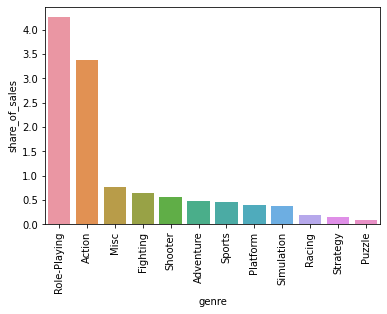

In [677]:
sns.barplot(x = 'genre', y = 'share_of_sales', data = data_genre_jp)
plt.xticks(rotation = 90)
plt.show()

Выделился жанр "Role-Playing" и "Role-Action", заметно, что в других регионах она находится на 5 и 7 позициях, в Японии на 1. Также видим, что между 1 и 2 позициями разницы почти нет. Остальные позиции почти все на одном уровне.

Общий вывод: во всех трех регионах на одной из лидирующих позиций стоит такая платформа как "Action". Также заметила, что в Северной Америке и в Европе первые 4 лидирующие позиции одинаковые.

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе:

Северная Америка:

In [678]:
data_rating_na = data_rating[['na_sales', 'rating']]
data_rating_na = data_rating_na.groupby(by = ['rating'], as_index=False)['na_sales'].sum()
data_rating_na = data_rating_na.sort_values(by = 'na_sales', ascending=False)

<AxesSubplot:xlabel='rating', ylabel='na_sales'>

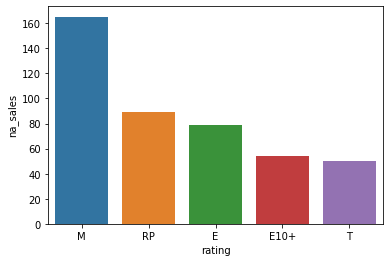

In [679]:
sns.barplot(x = 'rating', y = 'na_sales', data = data_rating_na)

В Северной Америке больше всего продаж приходится на игры с рейтингом М - игры для людей от 17 лет.

Европа:

In [680]:
data_rating_eu = data_rating[['eu_sales', 'rating']]
data_rating_eu = data_rating_eu.groupby(by = ['rating'], as_index=False)['eu_sales'].sum()
data_rating_eu = data_rating_eu.sort_values(by = 'eu_sales', ascending=False)

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

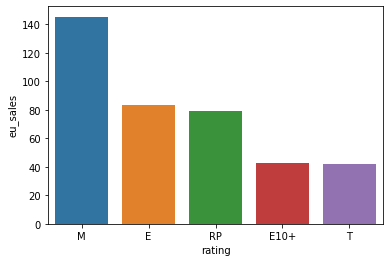

In [681]:
sns.barplot(x = 'rating', y = 'eu_sales', data = data_rating_eu)

В Европе также по продажам лидируют игры с рейтингом М. 

Япония:

In [682]:
data_rating_jp = data_rating[['jp_sales', 'rating']]
data_rating_jp = data_rating_jp.groupby(by = ['rating'], as_index=False)['jp_sales'].sum()
data_rating_jp = data_rating_jp.sort_values(by = 'jp_sales', ascending=False)

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

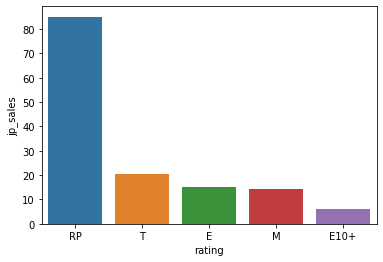

In [683]:
sns.barplot(x = 'rating', y = 'jp_sales', data = data_rating_jp)

В Японии все совсем иначе, по продажам лидируют игры которые еще ожидают рейтинга - RP. Далее игры с рейтингом Т - подросткам 13-19 лет, затем Е. В других регионах рейтинг М - от 17 лет, был на 1-ой позиции, а тут на 4-ой, в рейтинг Е10+ - для всех старше 10-ти лет, во всех регионах не входил в топ 3.

## Проверка гипотез

Для начала сформируем таблицу с нужными для нас данными:

In [684]:
data_for_hypothesis = data_actual_period[['platform', 'genre', 'user_score']]
data_for_hypothesis = data_for_hypothesis.query('user_score != "tbd"')
data_for_hypothesis['user_score'] = data_for_hypothesis['user_score'].astype('float')
display(data_for_hypothesis)
data_for_hypothesis_max = data_for_hypothesis.max()
data_for_hypothesis_min = data_for_hypothesis.min()
data_for_hypothesis_mean = data_for_hypothesis.mean()
display(data_for_hypothesis_max)
display(data_for_hypothesis_min)
display(data_for_hypothesis_mean)

,platform,genre,user_score
16,PS3,Action,8.2
23,X360,Action,8.1
42,PS4,Action,8.3
60,X360,Shooter,2.6
69,PS3,Shooter,2.6
...,...,...,...
16641,XOne,Sports,6.6
16650,WiiU,Action,8.5
16652,X360,Action,5.1
16658,XOne,Action,6.7


platform          XOne
genre         Strategy
user_score         9.3
dtype: object

platform         3DS
genre         Action
user_score       0.2
dtype: object

user_score    6.584564
dtype: float64

Далее сформулируем гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [685]:
array_xbox_one = data_for_hypothesis[data_for_hypothesis['platform'] == 'XOne']['user_score'].to_numpy()
array_pc = data_for_hypothesis[data_for_hypothesis['platform'] == 'PC']['user_score'].to_numpy()
alpha = 0.05
results = st.ttest_ind(array_xbox_one, array_pc)
display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

0.14012658403611647

'Не получилось отвергнуть нулевую гипотезу'

Для проверки гипотез использовала гипотезу о равенстве средних двух генеральных совокупностей по взятым из них выборкам - метод st.ttest_ind(). Использовала именно данный метод, потому что берем 2 совокупности одна по платформе "XOne" другая по "PC".

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-
игры) и Sports (англ. «спортивные соревнования») разные.

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-
игры) и Sports (англ. «спортивные соревнования») одинаковые.

In [686]:
array_action = data_for_hypothesis[data_for_hypothesis['genre'] == 'Action']['user_score'].to_numpy()
array_sports = data_for_hypothesis[data_for_hypothesis['genre'] == 'Sports']['user_score'].to_numpy()
alpha = 0.05
results = st.ttest_ind(array_action, array_sports)
display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

1.0517832389140023e-27

'Отвергаем нулевую гипотезу'

Для проверки гипотез использовала гипотезу о равенстве средних двух генеральных совокупностей по взятым из них выборкам - метод st.ttest_ind(). Использовала именно данный метод, потому что берем 2 совокупности одна по жанру "Action" другая по "Sports". Наше 'p-значение:' = 1.0517832389140023e-27 это значит , что 1.0517832389140023*10 в -27 степени = 0.000000...000010517832389140023 соответственно оно меньше чем alpha поэтому отвергаем нулевую гипотезу.

## Общий вывод

Проведя анализ можно сделать такой вывод: в топовые платформы вошли три платформы PlayStation, две платформы Nintendo и всего одна платформа Xbox. После проверки гипотез выявилось, что оценки пользователей по платформам одинаковые. По жанрам лидировали Action и Sports. После проверки гипотез было выявлено, что оценки пользователей по жанрам одинаковые, то есть нужно больше обращать внимание на каких платформах играют пользователи при прогнозе на 2017 год. Если рассматривать каждый регион в отдельности, то я выявила, что в Северной Америке лидирует платформа PS4, в Европе также платформа - PS4, а вот в Японии самые большие продажи игр на платформах Nintendo и PlayStation, а вот Xbox занимает 7 позицию и ниже. А в общем по суммарным продажам лидирует платформа PlayStation и является более популярной платформой для игр.